In [ ]:
#First motive is find the priority list of survivers. 

In [147]:
# Checking the python version
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


## Importing useful libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline
# Ignore warnings / (Pandas often makes warnings)
import warnings
warnings.filterwarnings('ignore')

## Load the data set

In [149]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [150]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [152]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hakkarainen, Mr. Pekka Pietari",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Survived

In [49]:

train["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


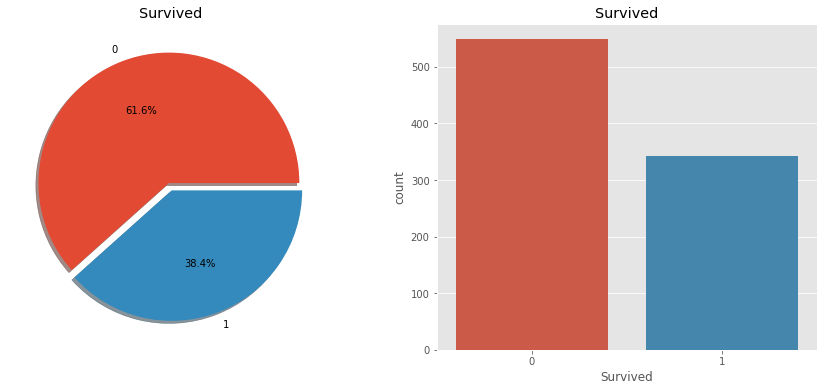

In [61]:
def piecount(col):
    f,ax=plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.03 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0],
                                       shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col,data=train,ax=ax[1])
    ax[1].set_title(col)
    plt.show()
    
piecount('Survived')

## Sex

In [62]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [63]:
# Interesting:The number of female survivers is more .{Gentlemen for a cause}

In [64]:
train1 = pd.get_dummies(train['Sex'])
print(train1)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


In [522]:
test1 = pd.get_dummies(test['Sex'])
print(test1)

     female  male
0         0     1
1         1     0
2         0     1
3         0     1
4         1     0
..      ...   ...
413       0     1
414       1     0
415       0     1
416       0     1
417       0     1

[418 rows x 2 columns]


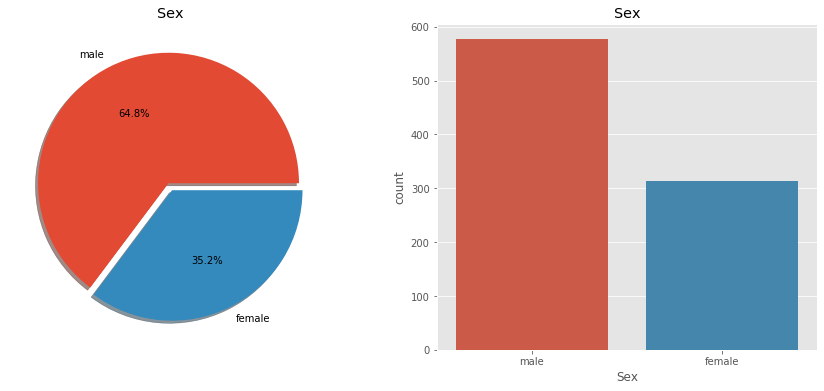

In [65]:
piecount('Sex')

## Pclass

In [66]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

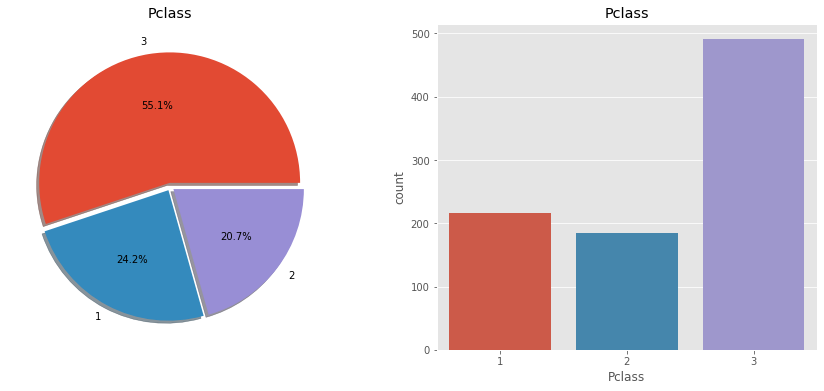

In [67]:
piecount('Pclass')

In [212]:
train2 = pd.get_dummies(train['Pclass'])
train2.columns =["Pclass_1","Pclass_2","Pclass_3"]
train2.head()


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [523]:
test2 = pd.get_dummies(test['Pclass'])
test2.columns =["Pclass_1","Pclass_2","Pclass_3"]
test2.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


## Age

In [214]:
train.groupby(['Age','Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

In [215]:
#Bining of age [Train]
bins = np.array([ min(train['Age']), 18, 40, 60, max(train['Age']) ])
group_name=['0-18 yrs','18-40 yrs','40-60 yrs','> 60 yrs']
train['age_binned']=pd.cut(train["Age"],bins,labels =group_name ,include_lowest = True)
bins

array([ 0.42, 18.  , 40.  , 60.  , 80.  ])

In [524]:
#Bining of age [Test]
bins = np.array([ min(test['Age']), 18, 40, 60, max(test['Age']) ])
group_name=['0-18 yrs','18-40 yrs','40-60 yrs','> 60 yrs']
test['age_binned']=pd.cut(test["Age"],bins,labels =group_name ,include_lowest = True)
bins

array([ 0.17, 18.  , 40.  , 60.  , 76.  ])

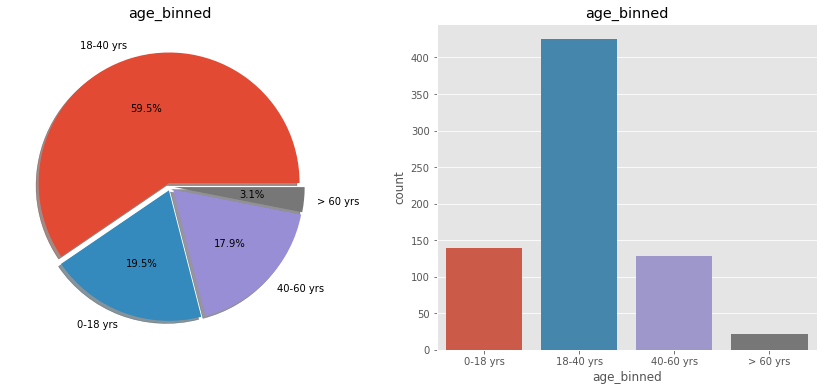

In [216]:
piecount('age_binned')

In [217]:
train.groupby(['age_binned','Survived'])['Survived'].count()

age_binned  Survived
0-18 yrs    0            69
            1            70
18-40 yrs   0           260
            1           165
40-60 yrs   0            78
            1            50
> 60 yrs    0            17
            1             5
Name: Survived, dtype: int64

In [218]:
train3 =pd.get_dummies(train['age_binned'])
train3



,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,0,1,0,0
888,0,0,0,0
889,0,1,0,0


In [525]:
test3 =pd.get_dummies(test['age_binned'])
test3


,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
413,0,0,0,0
414,0,1,0,0
415,0,1,0,0
416,0,0,0,0


## SibSp

In [74]:
train['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

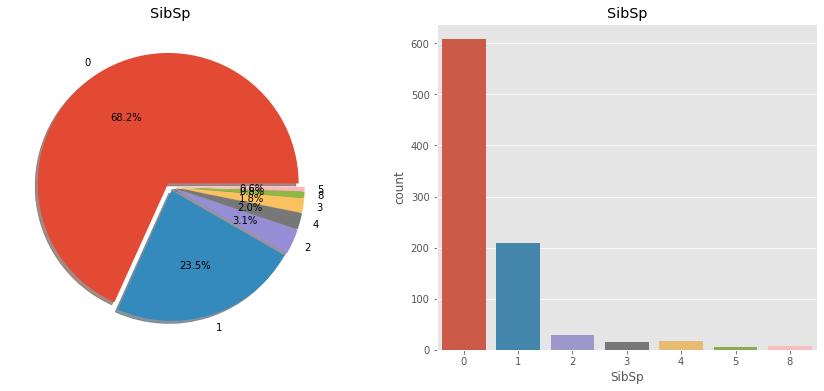

In [75]:
piecount('SibSp')

In [76]:
train.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [430]:
train7 =pd.get_dummies(train['SibSp'])
train7

,0,1,2,3,4,5,8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,1,0,0,0,0,0
889,1,0,0,0,0,0,0


In [526]:
test7 =pd.get_dummies(test['SibSp'])
test7

,0,1,2,3,4,5,8
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
413,1,0,0,0,0,0,0
414,1,0,0,0,0,0,0
415,1,0,0,0,0,0,0
416,1,0,0,0,0,0,0


## Parch

In [77]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

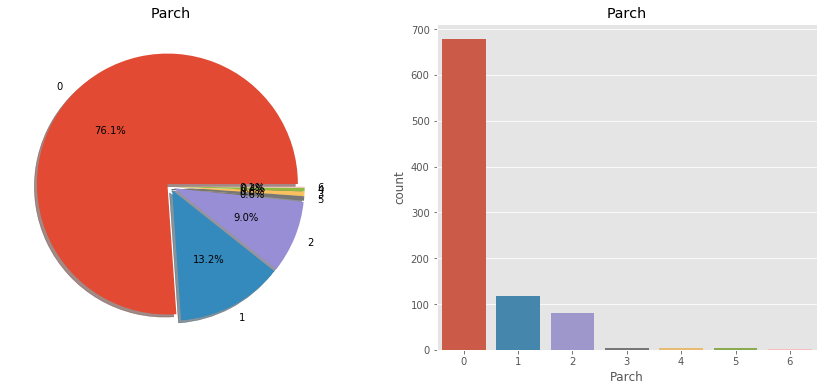

In [78]:
piecount('Parch')

In [79]:
train.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-40 yrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,18-40 yrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-40 yrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18-40 yrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,18-40 yrs


## Embarked

In [452]:
print(train.groupby(['Embarked','Survived'])['Survived'].count())

train4=pd.get_dummies(train['Embarked'])
train4

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [1132]:


test4=pd.get_dummies(test['Embarked'])
test4.drop(['C'],axis =1,inplace = True)
test4

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


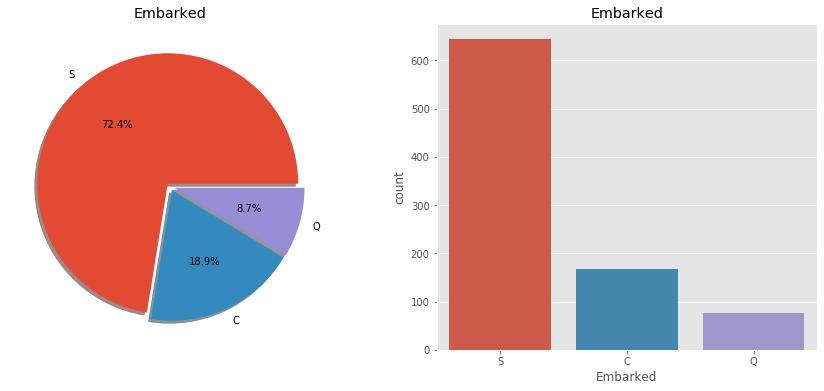

In [80]:
piecount('Embarked')

In [81]:
train.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

## Fare

In [156]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

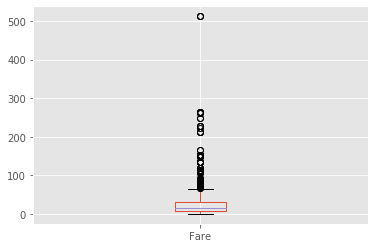

In [157]:
train['Fare'].plot(kind = 'box')

In [158]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


In [159]:
((train['Fare'] < (Q1 - 1.5 * IQR)) | (train['Fare']> (Q3 + 1.5 * IQR))).value_counts()

False    775
True     116
Name: Fare, dtype: int64

In [179]:
mean =train['Fare'].mean()
mean

32.2042079685746

In [180]:
for x in range(891):
    if( train.loc[x,'Fare']> (Q3 + 1.5 * IQR)):
        
        train.loc[x,'Fare'] = mean

        

In [181]:
((train['Fare'] < (Q1 - 1.5 * IQR)) | (train['Fare']> (Q3 + 1.5 * IQR))).value_counts()

False    891
Name: Fare, dtype: int64

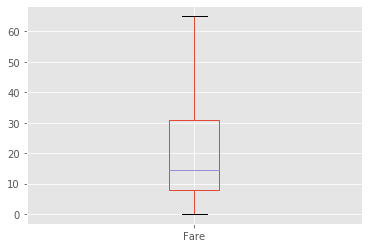

In [182]:
train['Fare'].plot(kind = 'box')

In [183]:
#Bining of Fare Train
bins = np.array([min(train['Fare']),10, 20,30,40,50,max(train['Fare'])] )
group_name=['Fare_1','Fare_2','Fare_3','Fare_4','Fare_5','Fare_6']
train['fare_binned']=pd.cut(train["Fare"],bins,labels =group_name ,include_lowest = True)
bins

array([ 0., 10., 20., 30., 40., 50., 65.])

In [529]:
#Bining of Fare TEST
bins = np.array([min(test['Fare']),10, 20,30,40,50,max(test['Fare'])] )
group_name=['Fare_1','Fare_2','Fare_3','Fare_4','Fare_5','Fare_6']
test['fare_binned']=pd.cut(test["Fare"],bins,labels =group_name ,include_lowest = True)
bins

array([  0.    ,  10.    ,  20.    ,  30.    ,  40.    ,  50.    ,
       512.3292])

In [220]:
train.groupby(['fare_binned','Survived'])['Survived'].count()

fare_binned  Survived
Fare_1       0           269
             1            67
Fare_2       0           103
             1            76
Fare_3       0            79
             1            63
Fare_4       0            72
             1           102
Fare_5       0            12
             1             4
Fare_6       0            14
             1            30
Name: Survived, dtype: int64

In [184]:

train5=pd.get_dummies(train['fare_binned'])
train5

,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
886,0,1,0,0,0,0
887,0,0,1,0,0,0
888,0,0,1,0,0,0
889,0,0,1,0,0,0


In [530]:
test5=pd.get_dummies(test['fare_binned'])
test5

,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
413,1,0,0,0,0,0
414,0,0,0,0,0,1
415,1,0,0,0,0,0
416,1,0,0,0,0,0


In [339]:
#train_new =pd.concat([train_new,train5],axis=1)


In [196]:
#train_new

NameError: name 'train_new' is not defined

### Group Size

In [197]:
g_size = []
for x in range(891):
  g_size.append(train.loc[x,'Parch']+train.loc[x,'SibSp']+1)


In [198]:
group_size= pd.DataFrame(g_size)
group_size.columns = ['Group_size']


In [199]:
train = pd.concat([train,group_size],axis=1)

In [200]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_binned,Group_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,Fare_1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C,Fare_4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,Fare_1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S,Fare_6,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,Fare_1,1


In [535]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \

In [536]:
g_size = []
for x in range(417):
  g_size.append(test.loc[x,'Parch']+test.loc[x,'SibSp']+1)
group_size= pd.DataFrame(g_size)
group_size.columns = ['Group_size']
test = pd.concat([test,group_size],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_binned,fare_binned,Group_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,18-40 yrs,Fare_1,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,40-60 yrs,Fare_1,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,> 60 yrs,Fare_1,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,18-40 yrs,Fare_1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,18-40 yrs,Fare_2,3.0


In [201]:
train.groupby(['Group_size','Survived'])['Survived'].count()

Group_size  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: Survived, dtype: int64

In [467]:
#Binned Group Size for Train
bins = np.array([0,min(train['Group_size']),2,3,4,max(train['Group_size'])] )
group_name=['Solo','Couple','Group_3','Group_4','Group_5']
train['group_binned']=pd.cut(train["Group_size"],bins,labels =group_name ,include_lowest = True)
bins

array([ 0,  1,  2,  3,  4, 11])

In [468]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_binned,Group_size,group_binned,age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,Fare_1,2,Couple,18-40 yrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C,Fare_4,2,Couple,18-40 yrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,Fare_1,1,Solo,18-40 yrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S,Fare_6,2,Couple,18-40 yrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,Fare_1,1,Solo,18-40 yrs


In [537]:
#Binned Group Size for Test
bins = np.array([0,min(test['Group_size']),2,3,4,max(test['Group_size'])] )
group_name=['Solo','Couple','Group_3','Group_4','Group_5']
test['group_binned']=pd.cut(test["Group_size"],bins,labels =group_name ,include_lowest = True)
bins

array([ 0.,  1.,  2.,  3.,  4., 11.])

In [469]:
train6=pd.get_dummies(train['group_binned'])
train6

,Solo,Couple,Group_3,Group_4,Group_5
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
886,1,0,0,0,0
887,1,0,0,0,0
888,0,0,0,1,0
889,1,0,0,0,0


In [538]:
test6=pd.get_dummies(test['group_binned'])
test6

,Solo,Couple,Group_3,Group_4,Group_5
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
413,1,0,0,0,0
414,1,0,0,0,0
415,1,0,0,0,0
416,1,0,0,0,0


### Cabin

In [940]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [1130]:
cabin_list =train['Cabin'].to_list()
cabin_list_f =[]
for x in (cabin_list):
    cabin_list_f.append(str(x)[0])
cabin_df = pd.DataFrame(cabin_list_f,columns=['Cabin_List'])
cabin_df.head()
cabin_df['Cabin_List'].value_counts()
train7 =pd.get_dummies(cabin_df['Cabin_List'])
train7.drop(['n','T','C'],axis = 1 ,inplace =True)
train7  


,A,B,D,E,F,G
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,1,0,0,0,0
888,0,0,0,0,0,0
889,0,0,0,0,0,0


In [1129]:
cabin_list =test['Cabin'].to_list()
cabin_list_f =[]
for x in (cabin_list):
    cabin_list_f.append(str(x)[0])
cabin_df = pd.DataFrame(cabin_list_f,columns=['Cabin_List'])
cabin_df.head()
cabin_df['Cabin_List'].value_counts()
test7 =pd.get_dummies(cabin_df['Cabin_List'])
test7.drop(['n','C'],axis = 1,inplace =True)
test7

,A,B,D,E,F,G
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
413,0,0,0,0,0,0
414,0,0,0,0,0,0
415,0,0,0,0,0,0
416,0,0,0,0,0,0


### Ticket


In [1047]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### Forming of new training data 

In [492]:
train_new= pd.concat([train1,train2,train3,train4,train5,train6],axis=1)

In [483]:
#train_new.drop(['C'],axis=1,inplace =True)

In [484]:
x= list(train_new.columns)
x

['female',
 'male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 '0-18 yrs',
 '18-40 yrs',
 '40-60 yrs',
 '> 60 yrs',
 'C',
 'Q',
 'S',
 'Fare_1',
 'Fare_2',
 'Fare_3',
 'Fare_4',
 'Fare_5',
 'Fare_6',
 'Solo',
 'Couple',
 'Group_3',
 'Group_4',
 'Group_5']

### Forming Of new Testing Data

In [539]:
test_new= pd.concat([test1,test2,test3,test4,test5,test6],axis=1)

In [540]:
x= list(test_new.columns)
x

['female',
 'male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 '0-18 yrs',
 '18-40 yrs',
 '40-60 yrs',
 '> 60 yrs',
 'C',
 'Q',
 'S',
 'Fare_1',
 'Fare_2',
 'Fare_3',
 'Fare_4',
 'Fare_5',
 'Fare_6',
 'Solo',
 'Couple',
 'Group_3',
 'Group_4',
 'Group_5']

## Linear Regression

In [493]:
from sklearn.linear_model import LinearRegression

In [494]:
X=train_new[x[:]]
X

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,C,S,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Solo,Couple,Group_3
0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
887,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
888,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
889,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [495]:
y=train.Survived

In [496]:
lm1=LinearRegression().fit(X,y)
lm1_preds = lm1.predict(X)

In [497]:
from sklearn.metrics import r2_score
#print(lm1.intercept_)
#print(lm1.coef_)
#print(lm1_preds)
print("R^2 :",r2_score(y,lm1_preds))
#list(zip(x[:],lm1.coef_))

R^2 : 0.4079196860704202


## Logistic Regression

In [563]:
train_new= pd.concat([train1,train2,train3,train4,train5,train6],axis=1)

In [564]:
train_logr=train_new
train_logr.head()

,female,male,Pclass_1,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,C,...,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Solo,Couple,Group_3,Group_4,Group_5
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [565]:
test_new= pd.concat([test1,test2,test3,test4,test5,test6],axis=1)

In [566]:
test_logr =test_new
test_logr.head()

,female,male,Pclass_1,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,C,...,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Solo,Couple,Group_3,Group_4,Group_5
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [567]:
train_logr.drop(['male','Pclass_1','Q'],axis=1,inplace = True)
x_train= list(train_logr.columns)

In [568]:

test_logr.drop(['male','Pclass_1','Q'],axis=1,inplace = True)
x_test= list(test_logr.columns)

In [569]:
X_train=train_logr[x_train[:]]
X_train.head()

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,C,S,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Solo,Couple,Group_3,Group_4,Group_5
0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [561]:
X_test=test_logr[x_test[:]]
X_test.head()

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,C,S,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Solo,Couple,Group_3,Group_4,Group_5
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [570]:
y=train.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
lr1 = LogisticRegression()
lr1.fit(X_train, y)
lr1_preds = lr1.predict(X_test)
#accuracy = accuracy_score(y,lr1_preds)
parameters = lr1.coef_
#print(accuracy)
#print(parameters)
a=np.arange(892,1310,1)
b= list(a)
c=list(lr1_preds)
sur= pd.DataFrame(map(int,c),columns=['Survived'])
pse =pd.DataFrame(map(int,b),columns=['PassengerId'])

In [680]:
sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [681]:
pse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [684]:
final= pd.concat([pse,sur],axis=1)

In [685]:
final.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [686]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [688]:
final.to_csv('gender_submission.csv',index = False)



In [690]:
final['Survived'].value_counts()

0    243
1    175
Name: Survived, dtype: int64

# Decision Tree

In [1133]:
train_new= pd.concat([train1,train2,train3,train4,train5,train6,train7],axis=1)
train_dt=train_new
print(train_dt.shape)
train_dt.head()
train_dt.info()

(891, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   female     891 non-null    uint8
 1   male       891 non-null    uint8
 2   Pclass_1   891 non-null    uint8
 3   Pclass_2   891 non-null    uint8
 4   Pclass_3   891 non-null    uint8
 5   0-18 yrs   891 non-null    uint8
 6   18-40 yrs  891 non-null    uint8
 7   40-60 yrs  891 non-null    uint8
 8   > 60 yrs   891 non-null    uint8
 9   C          891 non-null    uint8
 10  Q          891 non-null    uint8
 11  S          891 non-null    uint8
 12  Fare_1     891 non-null    uint8
 13  Fare_2     891 non-null    uint8
 14  Fare_3     891 non-null    uint8
 15  Fare_4     891 non-null    uint8
 16  Fare_5     891 non-null    uint8
 17  Fare_6     891 non-null    uint8
 18  Solo       891 non-null    uint8
 19  Couple     891 non-null    uint8
 20  Group_3    891 non-null    uint8
 21  Group_

In [1134]:
train_dt.drop(['male','Pclass_1','C','> 60 yrs','Group_5'],axis=1,inplace = True)
x_train_dt= list(train_dt.columns)


In [1135]:
x_train_dt

['female',
 'Pclass_2',
 'Pclass_3',
 '0-18 yrs',
 '18-40 yrs',
 '40-60 yrs',
 'Q',
 'S',
 'Fare_1',
 'Fare_2',
 'Fare_3',
 'Fare_4',
 'Fare_5',
 'Fare_6',
 'Solo',
 'Couple',
 'Group_3',
 'Group_4',
 'A',
 'B',
 'D',
 'E',
 'F',
 'G']

In [1136]:
X_train_dt=train_dt[x_train_dt[:]]

In [1137]:
X_train_dt

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,Q,S,Fare_1,Fare_2,...,Solo,Couple,Group_3,Group_4,A,B,D,E,F,G
0,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
887,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
888,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
889,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Training Data

In [1138]:
t =[] 

In [1139]:
for x in range(890):
    for y in range(23):
        t.append(X_train_dt.iloc[x,y])

In [1140]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
  
# How many elements each 
# list should have 
n = 24
  
x_train_dt = list(divide_chunks(t, n)) 


In [1141]:
y_train_dt=train.Survived.values.tolist()

### Testing Data

In [1142]:
test_new= pd.concat([test1,test2,test3,test4,test5,test6,test7],axis=1)

In [1143]:
test_dt =test_new
test_dt.head()

,female,male,Pclass_1,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,> 60 yrs,Q,...,Couple,Group_3,Group_4,Group_5,A,B,D,E,F,G
0,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [1144]:
test_dt.drop(['male','Pclass_1','> 60 yrs','Group_5'],axis=1,inplace = True)
x_test_dt= list(test_dt.columns)

In [1145]:
X_test_dt=test_dt[x_test_dt[:]]
X_test_dt.head()

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,Q,S,Fare_1,Fare_2,...,Solo,Couple,Group_3,Group_4,A,B,D,E,F,G
0,0,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1155]:
X_test_dt

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,Q,S,Fare_1,Fare_2,...,Solo,Couple,Group_3,Group_4,A,B,D,E,F,G
0,0,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
414,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
415,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
416,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [1156]:
X_train_dt

,female,Pclass_2,Pclass_3,0-18 yrs,18-40 yrs,40-60 yrs,Q,S,Fare_1,Fare_2,...,Solo,Couple,Group_3,Group_4,A,B,D,E,F,G
0,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
887,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
888,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
889,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1148]:
l =[]

In [1157]:
for x in range(417):
    for y in range(23):
        l.append(X_test_dt.iloc[x,y])

In [1158]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
  
# How many elements each 
# list should have 
n = 24
  
x_test_dt = list(divide_chunks(l, n)) 
x_test_dt

[[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0,

In [1169]:
from sklearn import tree
X = X_train_dt
Y = y_train_dt
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [1170]:
clf_preds=clf.predict(X_test_dt)

In [1171]:
a=np.arange(892,1310,1)
b= list(a)
c=list(clf_preds)
sur= pd.DataFrame(map(int,c),columns=['Survived'])
pse =pd.DataFrame(map(int,b),columns=['PassengerId'])

In [1179]:
final_dt= pd.concat([pse,sur],axis=1)

In [1180]:
final_dt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1181]:
final_dt.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [1182]:
final_dt.to_csv('gender_submission.csv',index = False)

In [1183]:
final_dt['Survived'].value_counts()

0    293
1    125
Name: Survived, dtype: int64